In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Rename columns to lower case:
df0.columns = df0.columns.str.lower()
# Correct 'average_montly_hours' to 'average_monthly_hours'
df0.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable.
df1 = df0.drop_duplicates(keep='first').copy()

# Display first few rows of new dataframe.
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'salary' column using .loc
df1.loc[:, 'salary_encoded'] = label_encoder.fit_transform(df1['salary'])
# Drop the 'salary' column
df1 = df1.drop(columns='salary').copy()

df_encoded = pd.get_dummies(df1, columns=['department'], drop_first=True)

In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


In [ ]:
# Convert boolean department columns to uint8
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype('uint8')

# Verify all binary/categorical columns are uint8
binary_cols = ['work_accident', 'left', 'promotion_last_5years', 'salary_encoded'] + list(bool_cols)
df_encoded[binary_cols] = df_encoded[binary_cols].astype('uint8')

# Float columns can stay as float64
float_cols = ['satisfaction_level', 'last_evaluation']
df_encoded[float_cols] = df_encoded[float_cols].astype('float64')

# Integer columns as uint8
int_cols = ['number_project', 'average_monthly_hours', 'time_spend_company']
df_encoded[int_cols] = df_encoded[int_cols].astype('uint8')

# Verify new dtypes
print("\nUpdated datatypes:")
print(df_encoded.dtypes)


Updated datatypes:
satisfaction_level        float64
last_evaluation           float64
number_project              uint8
average_monthly_hours       uint8
time_spend_company          uint8
work_accident               uint8
left                        uint8
promotion_last_5years       uint8
salary_encoded              uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object


In [ ]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,6,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,16,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


Multicollinearity is a concern for logistic regression (unlike Random Forests). A correlation matrix can help to find highly correlated (>0.8) features.

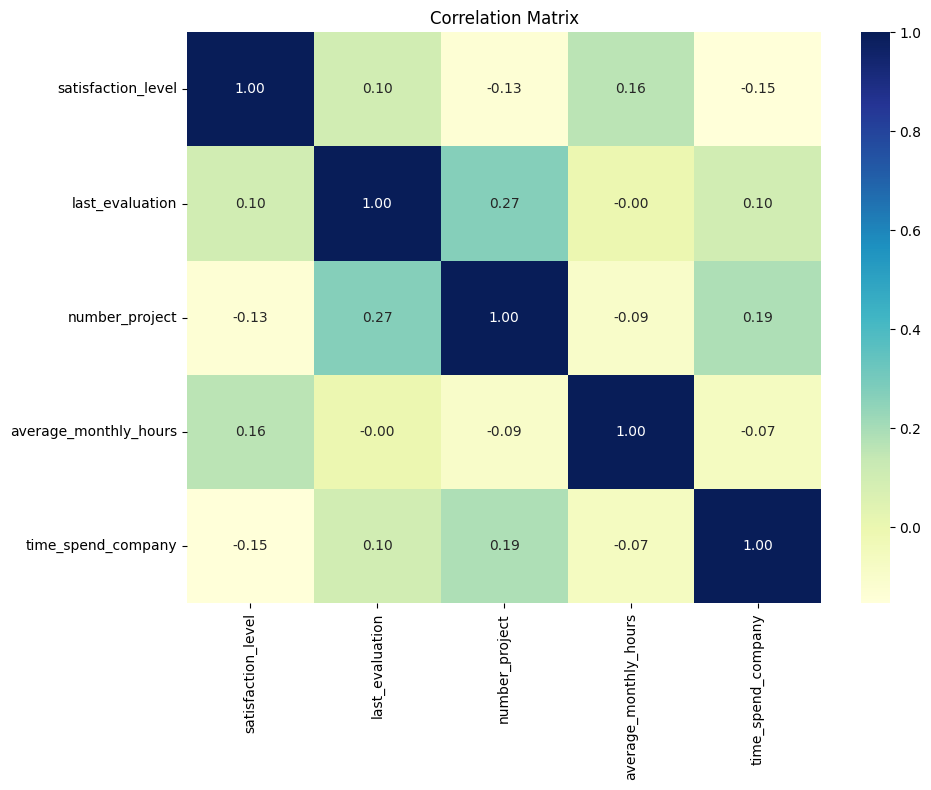

In [ ]:
# Create correlation matrix
correlation_matrix = df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='YlGnBu',
            fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# calculate outliers in df_encoded['time_spend_company']
q1 = df_encoded['time_spend_company'].quantile(0.25)
q3 = df_encoded['time_spend_company'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded['time_spend_company'] < lower_bound) | (df_encoded['time_spend_company'] > upper_bound)]
#remove outliers and save a new dataframe called df_logreg
df_logreg = df_encoded[~df_encoded['time_spend_company'].isin(outliers['time_spend_company'])]
# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,16,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_encoded,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,16,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Split the dataset into features and target
X = df_logreg.drop(columns='left')
y = df_logreg['left']

In [ ]:
# calculate class imbalance
class_imbalance = y.value_counts(normalize=True) * 100
print("Class imbalance:\n", class_imbalance)

Class imbalance:
 left
0    83.146772
1    16.853228
Name: proportion, dtype: float64


In [ ]:
# 1. Split data into train + val and test first; test size 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Split remaining data into train and validation (# 0.25 x 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [ ]:
# Standardize the feature values with 'StandardScaler' (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 5. Define parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced'],
    'max_iter': [10000]
}

In [ ]:
# 6. Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'], 'max_iter': [10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
# Print best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation recall:", grid_search.best_score_)

Best parameters: {'C': 0.0018329807108324356, 'class_weight': 'balanced', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation recall: 0.9753424657534246


In [ ]:
# Get best model
best_model = grid_search.best_estimator_


In [ ]:
# Evaluate on validation set
val_pred = best_model.predict(X_val_scaled)
val_prob = best_model.predict_proba(X_val_scaled)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, val_pred, zero_division=0))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      1835
           1       0.38      0.98      0.54       399

    accuracy                           0.70      2234
   macro avg       0.68      0.81      0.66      2234
weighted avg       0.88      0.70      0.74      2234



In [ ]:
# Final evaluation on test set
test_pred = best_model.predict(X_test_scaled)
test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nTest Set Performance:")
print(classification_report(y_test, test_pred, zero_division=0))



Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1846
           1       0.37      0.98      0.54       388

    accuracy                           0.71      2234
   macro avg       0.68      0.82      0.66      2234
weighted avg       0.89      0.71      0.74      2234



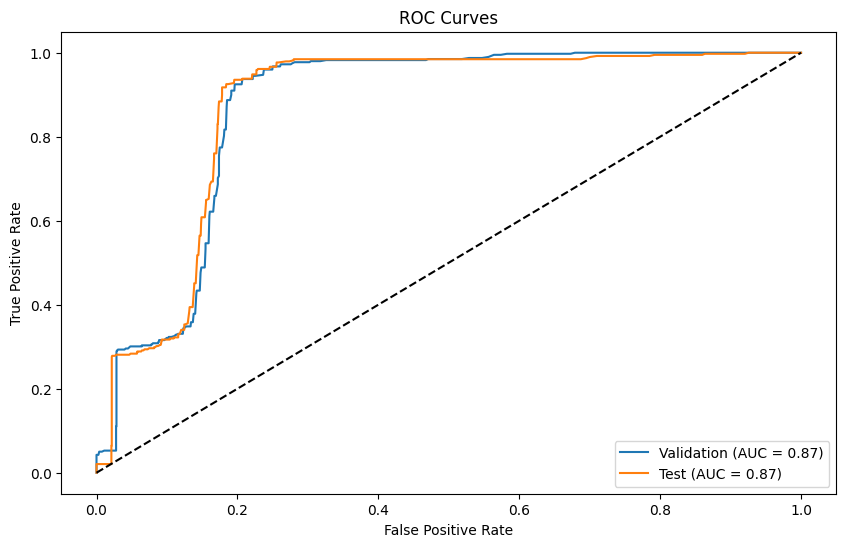

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
# Validation ROC
fpr_val, tpr_val, _ = roc_curve(y_val, val_prob)
plt.plot(fpr_val, tpr_val,
         label=f'Validation (AUC = {roc_auc_score(y_val, val_prob):.2f})')
# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_test, test_prob)
plt.plot(fpr_test, tpr_test,
         label=f'Test (AUC = {roc_auc_score(y_test, test_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

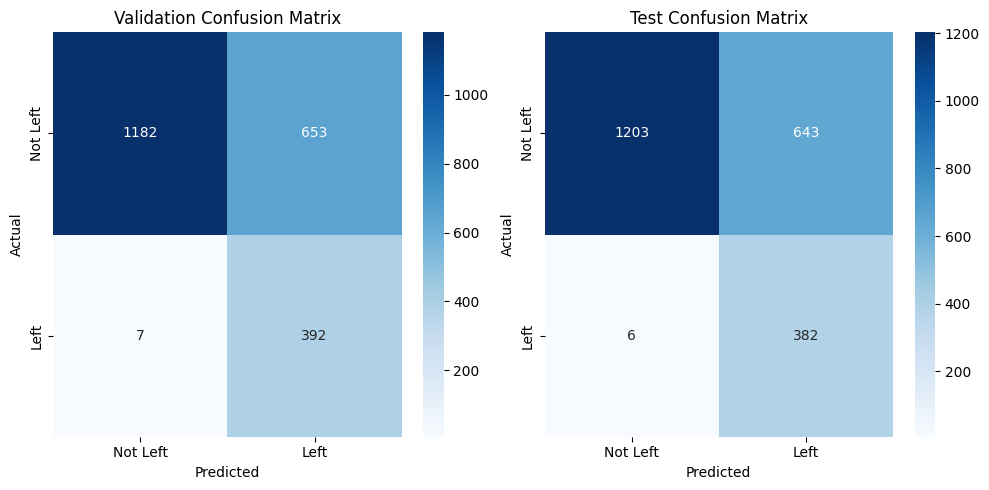

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
# Validation Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_val, val_pred),
            annot=True,
            cmap='Blues',
            fmt='d',
            xticklabels=['Not Left', 'Left'],
            yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.tight_layout()
# Test Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, test_pred),
            annot=True,
            cmap='Blues',
            fmt='d',
            xticklabels=['Not Left', 'Left'],
            yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.tight_layout()
plt.show()